In [1]:
# =============================================================================
# KIGALI SMART TRANSPORT INSIGHTS: COMPLETE DATA ANALYTICS PROJECT
# Project: Optimizing Public Transport Operators Through Data Analytics
# Dataset: Rwanda Public Transport Facilities and Operators Dataset
# Author: [ishimwe Egide]
# Date: August 2025
# =============================================================================

# =============================================================================
# STEP 1: INSTALL AND IMPORT REQUIRED LIBRARIES
# =============================================================================

# Install required packages (run these in your Jupyter notebook)
# !pip install pandas numpy matplotlib seaborn plotly folium scikit-learn
# !pip install geopandas contextily

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from folium import plugins
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import silhouette_score

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print("📊 Ready to analyze Kigali Transport Data")


✅ All libraries imported successfully!
📊 Ready to analyze Kigali Transport Data


In [2]:
# =============================================================================
# STEP 2: LOAD AND EXPLORE THE DATASET
# =============================================================================

# Load the dataset
df = pd.read_csv('merged_transport_data_rwanda(1).csv')

print("🚌 KIGALI TRANSPORT DATASET LOADED")
print("=" * 50)
print(f"📈 Dataset Shape: {df.shape}")
print(f"📊 Rows: {df.shape[0]} | Columns: {df.shape[1]}")
print("\n🔍 COLUMN INFORMATION:")
print("-" * 30)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n📋 FIRST 3 ROWS PREVIEW:")
print("-" * 40)
print(df.head(3))

print("\n📊 BASIC DATASET INFO:")
print("-" * 25)
print(df.info())


🚌 KIGALI TRANSPORT DATASET LOADED
📈 Dataset Shape: (30, 20)
📊 Rows: 30 | Columns: 20

🔍 COLUMN INFORMATION:
------------------------------
 1. REFERENCE_ID
 2. OPERATOR_NAME
 3. OPERATOR_PHONE
 4. EMAIL
 5. WEBSITE
 6. ADDRESS
 7. REGIONS
 8. OPERATING_AREA
 9. OPERATOR_TYPE
10. LOCATION_NAME
11. TSN
12. LATITUDE
13. LONGITUDE
14. EFA_ID
15. FACILITIES
16. ACCESSIBILITY
17. TRANSPORT_MODE
18. MORNING_PEAK
19. AFTERNOON_PEAK
20. SHORT_PLATFORM

📋 FIRST 3 ROWS PREVIEW:
----------------------------------------
   REFERENCE_ID            OPERATOR_NAME  OPERATOR_PHONE  \
0        900165  Kimironko Transport Co.    250763131852   
1        900181        Green Moto Kigali    250741583857   
2        900188        Volcano Taxi Ltd.    250742047250   

                                EMAIL                            WEBSITE  \
0  info@centralcoastlimousines.com.au  www.centralcoastlimousines.com.au   
1               hirercars4u@gmail.com              www.hirecars4u.com.au   
2             info

In [3]:
# =============================================================================
# STEP 3: DATA QUALITY ASSESSMENT
# =============================================================================

print("\n" + "=" * 60)
print("🔍 DATA QUALITY ASSESSMENT")
print("=" * 60)

# Check for missing values
missing_values = df.isnull().sum()
print("\n📊 MISSING VALUES ANALYSIS:")
print("-" * 35)
if missing_values.sum() == 0:
    print("✅ No missing values found - dataset is clean!")
else:
    print(missing_values[missing_values > 0])

# Check data types
print("\n📋 DATA TYPES:")
print("-" * 20)
print(df.dtypes)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔄 DUPLICATE RECORDS: {duplicates}")

# Basic statistics for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print("\n📈 NUMERIC COLUMNS STATISTICS:")
    print("-" * 35)
    print(df[numeric_cols].describe())

print("\n✅ DATA QUALITY CHECK COMPLETED!")


🔍 DATA QUALITY ASSESSMENT

📊 MISSING VALUES ANALYSIS:
-----------------------------------
✅ No missing values found - dataset is clean!

📋 DATA TYPES:
--------------------
REFERENCE_ID        int64
OPERATOR_NAME      object
OPERATOR_PHONE      int64
EMAIL              object
WEBSITE            object
ADDRESS            object
REGIONS            object
OPERATING_AREA     object
OPERATOR_TYPE      object
LOCATION_NAME      object
TSN                 int64
LATITUDE          float64
LONGITUDE         float64
EFA_ID              int64
FACILITIES         object
ACCESSIBILITY      object
TRANSPORT_MODE     object
MORNING_PEAK       object
AFTERNOON_PEAK     object
SHORT_PLATFORM       bool
dtype: object

🔄 DUPLICATE RECORDS: 0

📈 NUMERIC COLUMNS STATISTICS:
-----------------------------------
        REFERENCE_ID  OPERATOR_PHONE           TSN   LATITUDE  LONGITUDE  \
count      30.000000    3.000000e+01     30.000000  30.000000  30.000000   
mean   900505.966667    2.507521e+11  20025.466667


📊 EXPLORATORY DATA ANALYSIS (EDA)


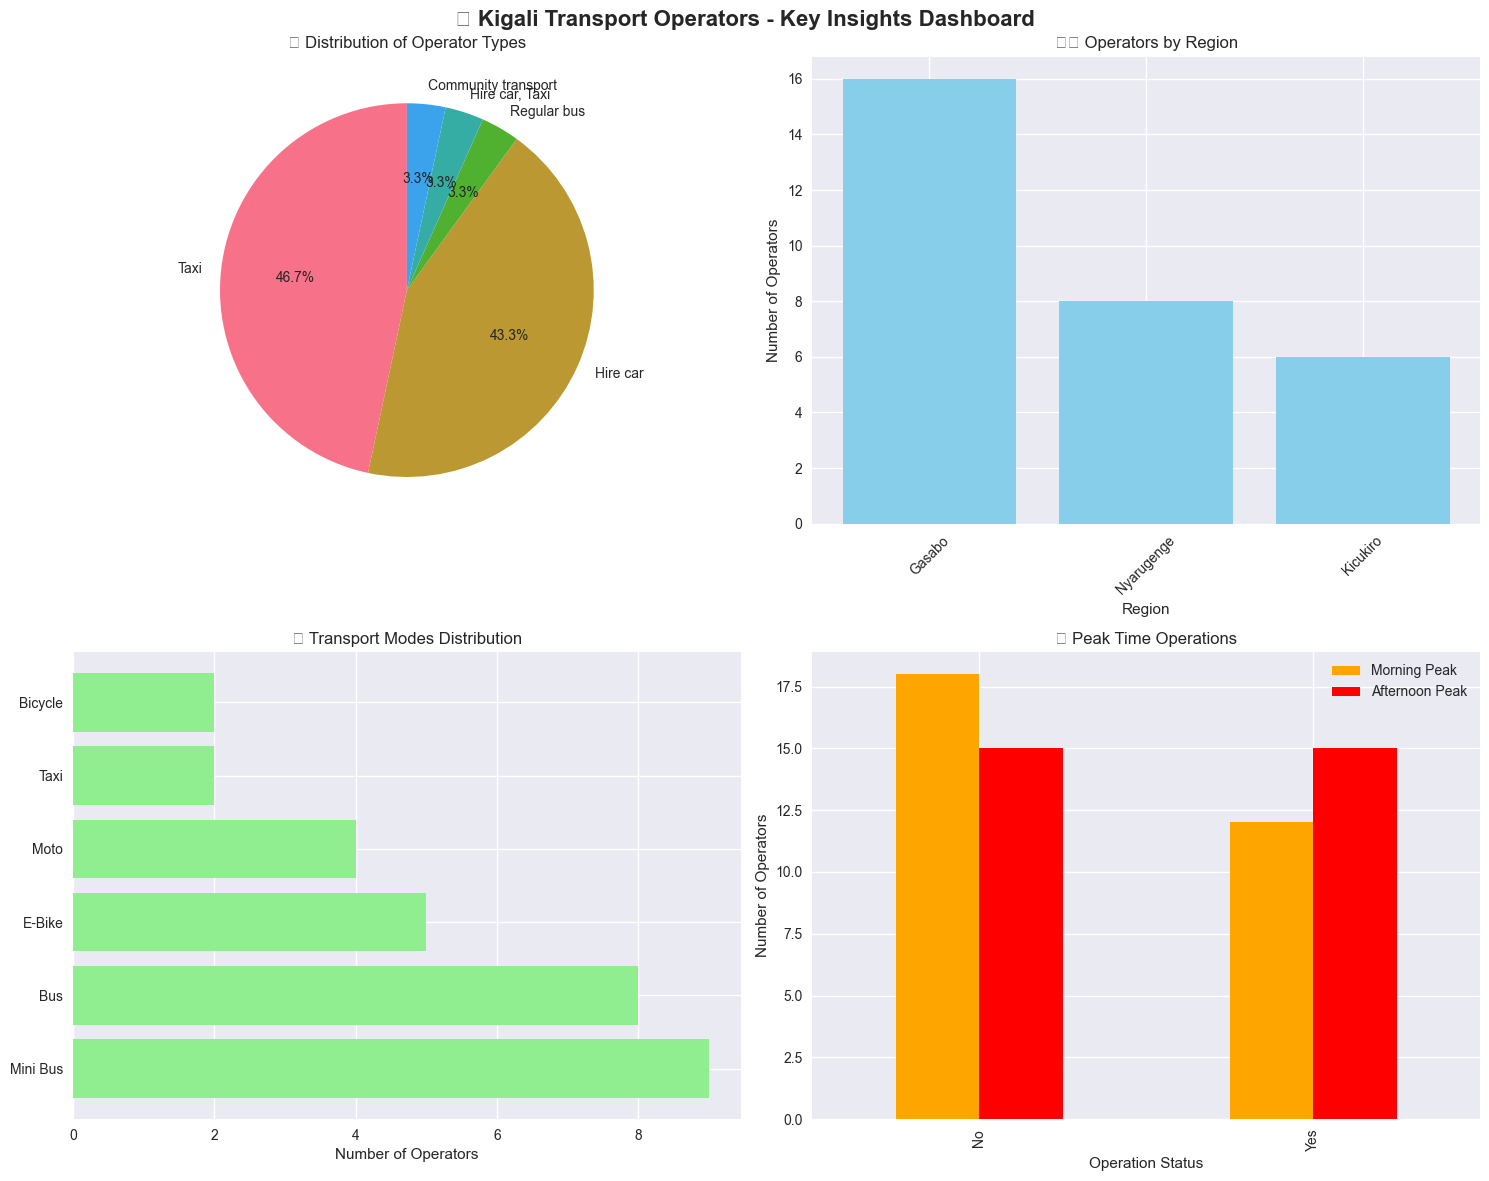

In [4]:
# =============================================================================
# STEP 4: EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================

print("\n" + "=" * 60)
print("📊 EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 60)

# Create figure for multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🚌 Kigali Transport Operators - Key Insights Dashboard', fontsize=16, fontweight='bold')

# 1. Operator Type Distribution
operator_counts = df['OPERATOR_TYPE'].value_counts()
axes[0, 0].pie(operator_counts.values, labels=operator_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('🚗 Distribution of Operator Types')

# 2. Regional Distribution
region_counts = df['REGIONS'].value_counts()
axes[0, 1].bar(region_counts.index, region_counts.values, color='skyblue')
axes[0, 1].set_title('🗺️ Operators by Region')
axes[0, 1].set_xlabel('Region')
axes[0, 1].set_ylabel('Number of Operators')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Transport Mode Analysis
transport_mode_counts = df['TRANSPORT_MODE'].value_counts()
axes[1, 0].barh(transport_mode_counts.index, transport_mode_counts.values, color='lightgreen')
axes[1, 0].set_title('🚌 Transport Modes Distribution')
axes[1, 0].set_xlabel('Number of Operators')

# 4. Peak Time Operations
peak_data = pd.DataFrame({
    'Morning Peak': df['MORNING_PEAK'].value_counts(),
    'Afternoon Peak': df['AFTERNOON_PEAK'].value_counts()
})
peak_data.plot(kind='bar', ax=axes[1, 1], color=['orange', 'red'])
axes[1, 1].set_title('⏰ Peak Time Operations')
axes[1, 1].set_xlabel('Operation Status')
axes[1, 1].set_ylabel('Number of Operators')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [5]:
# =============================================================================
# STEP 5: INTERACTIVE VISUALIZATIONS WITH PLOTLY
# =============================================================================

print("\n📊 CREATING INTERACTIVE VISUALIZATIONS...")

# Interactive map of operators in Kigali
def create_kigali_transport_map():
    """Create an interactive map showing transport operators in Kigali"""
    
    # Filter valid coordinates (assuming Kigali coordinates)
    map_data = df.dropna(subset=['LATITUDE', 'LONGITUDE'])
    
    # Create base map centered on Kigali
    kigali_map = folium.Map(
        location=[-1.9441, 30.0619],  # Kigali coordinates
        zoom_start=12,
        tiles='OpenStreetMap'
    )
    
    # Color mapping for operator types
    colors = {'Taxi': 'red', 'Hire car': 'blue', 'Bus': 'green', 'Motorcycle': 'orange'}
    
    # Add markers for each operator
    for idx, row in map_data.iterrows():
        color = colors.get(row['OPERATOR_TYPE'], 'gray')
        
        folium.CircleMarker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            radius=8,
            popup=f"""
            <b>{row['OPERATOR_NAME']}</b><br>
            Type: {row['OPERATOR_TYPE']}<br>
            Region: {row['REGIONS']}<br>
            Phone: {row['OPERATOR_PHONE']}<br>
            Operating Area: {row['OPERATING_AREA']}
            """,
            color=color,
            fill=True,
            fillColor=color,
            fillOpacity=0.7
        ).add_to(kigali_map)
    
    # Add legend
    legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 150px; height: 120px; 
                background-color: white; border:2px solid grey; z-index:9999; 
                font-size:14px; padding: 10px">
    <p><b>🚌 Operator Types</b></p>
    <p><i class="fa fa-circle" style="color:red"></i> Taxi</p>
    <p><i class="fa fa-circle" style="color:blue"></i> Hire Car</p>
    <p><i class="fa fa-circle" style="color:green"></i> Bus</p>
    <p><i class="fa fa-circle" style="color:orange"></i> Motorcycle</p>
    </div>
    '''
    kigali_map.get_root().html.add_child(folium.Element(legend_html))
    
    return kigali_map

# Create and display the map
transport_map = create_kigali_transport_map()
transport_map.save('kigali_transport_operators_map.html')
print("✅ Interactive map saved as 'kigali_transport_operators_map.html'")


📊 CREATING INTERACTIVE VISUALIZATIONS...
✅ Interactive map saved as 'kigali_transport_operators_map.html'


In [6]:
# =============================================================================
# STEP 6: KEY STATISTICS SUMMARY
# =============================================================================

print("\n" + "=" * 60)
print("📈 KEY STATISTICS SUMMARY")
print("=" * 60)

# Calculate key statistics
total_operators = len(df)
unique_regions = df['REGIONS'].nunique()
unique_operator_types = df['OPERATOR_TYPE'].nunique()
morning_peak_operators = df['MORNING_PEAK'].value_counts().get('Yes', 0)
afternoon_peak_operators = df['AFTERNOON_PEAK'].value_counts().get('Yes', 0)

print(f"🚌 Total Transport Operators: {total_operators}")
print(f"🗺️ Operating Regions: {unique_regions}")
print(f"🚗 Types of Operators: {unique_operator_types}")
print(f"🌅 Morning Peak Operators: {morning_peak_operators}")
print(f"🌆 Afternoon Peak Operators: {afternoon_peak_operators}")

print("\n📊 TOP 5 OPERATORS BY TYPE:")
print("-" * 35)
print(df['OPERATOR_TYPE'].value_counts().head())

print("\n🗺️ REGIONAL DISTRIBUTION:")
print("-" * 25)
print(df['REGIONS'].value_counts())

print("\n🚌 TRANSPORT MODE ANALYSIS:")
print("-" * 30)
print(df['TRANSPORT_MODE'].value_counts())


📈 KEY STATISTICS SUMMARY
🚌 Total Transport Operators: 30
🗺️ Operating Regions: 3
🚗 Types of Operators: 5
🌅 Morning Peak Operators: 12
🌆 Afternoon Peak Operators: 15

📊 TOP 5 OPERATORS BY TYPE:
-----------------------------------
OPERATOR_TYPE
Taxi                   14
Hire car               13
Regular bus             1
Hire car, Taxi          1
Community transport     1
Name: count, dtype: int64

🗺️ REGIONAL DISTRIBUTION:
-------------------------
REGIONS
Gasabo        16
Nyarugenge     8
Kicukiro       6
Name: count, dtype: int64

🚌 TRANSPORT MODE ANALYSIS:
------------------------------
TRANSPORT_MODE
Mini Bus    9
Bus         8
E-Bike      5
Moto        4
Taxi        2
Bicycle     2
Name: count, dtype: int64


In [7]:
# =============================================================================
# STEP 7: MACHINE LEARNING ANALYSIS
# =============================================================================

print("\n" + "=" * 60)
print("🤖 MACHINE LEARNING ANALYSIS")
print("=" * 60)

# Prepare data for machine learning
print("🔄 Preparing data for machine learning...")

# Create a copy for ML processing
ml_df = df.copy()

# Feature Engineering
# Create binary features for peak operations
ml_df['PEAK_OPERATIONS'] = ((ml_df['MORNING_PEAK'] == 'Yes') | (ml_df['AFTERNOON_PEAK'] == 'Yes')).astype(int)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['REGIONS', 'OPERATING_AREA', 'TRANSPORT_MODE']

for col in categorical_columns:
    if col in ml_df.columns:
        le = LabelEncoder()
        ml_df[f'{col}_ENCODED'] = le.fit_transform(ml_df[col].astype(str))
        label_encoders[col] = le

# Select features for clustering (focusing on location and operation type)
clustering_features = []
if 'LATITUDE' in ml_df.columns and 'LONGITUDE' in ml_df.columns:
    clustering_features.extend(['LATITUDE', 'LONGITUDE'])
if 'REGIONS_ENCODED' in ml_df.columns:
    clustering_features.append('REGIONS_ENCODED')
if 'OPERATING_AREA_ENCODED' in ml_df.columns:
    clustering_features.append('OPERATING_AREA_ENCODED')
if 'PEAK_OPERATIONS' in ml_df.columns:
    clustering_features.append('PEAK_OPERATIONS')

print(f"✅ Selected features for analysis: {clustering_features}")



🤖 MACHINE LEARNING ANALYSIS
🔄 Preparing data for machine learning...
✅ Selected features for analysis: ['LATITUDE', 'LONGITUDE', 'REGIONS_ENCODED', 'OPERATING_AREA_ENCODED', 'PEAK_OPERATIONS']



🎯 PERFORMING K-MEANS CLUSTERING ANALYSIS
---------------------------------------------


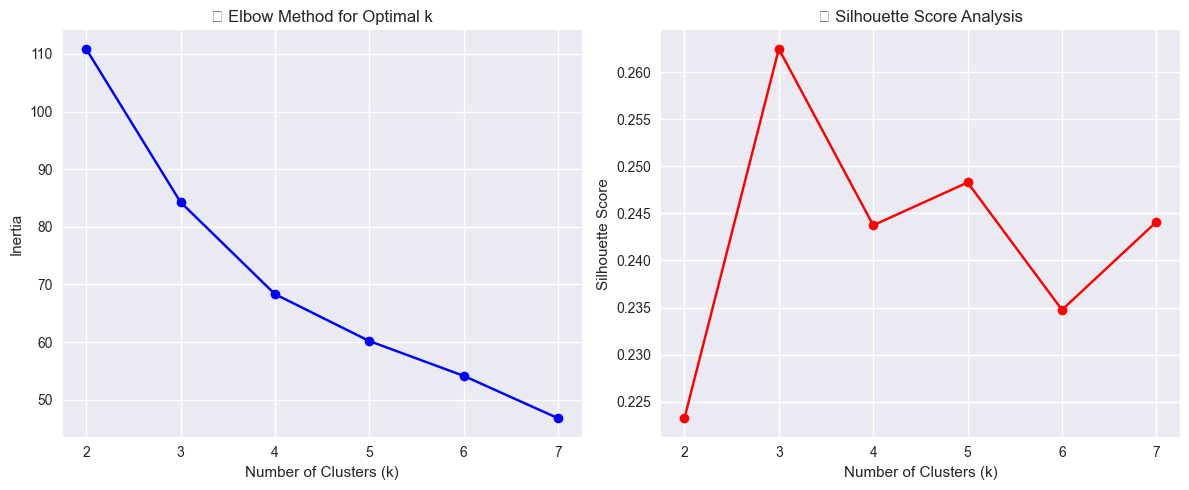

✅ K-Means clustering completed with k=4
📊 Silhouette Score: 0.244

🎯 CLUSTER ANALYSIS:
-------------------------
         Operators_Count Dominant_Region Dominant_Type  Avg_Peak_Operations
CLUSTER                                                                    
0.0                    8          Gasabo          Taxi                1.000
1.0                    6          Gasabo      Hire car                0.000
2.0                    7      Nyarugenge      Hire car                0.429
3.0                    9          Gasabo          Taxi                1.000


In [8]:
# =============================================================================
# STEP 8: K-MEANS CLUSTERING ANALYSIS
# =============================================================================

if len(clustering_features) >= 2:
    print("\n🎯 PERFORMING K-MEANS CLUSTERING ANALYSIS")
    print("-" * 45)
    
    # Prepare clustering data
    X_cluster = ml_df[clustering_features].dropna()
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_cluster)
    
    # Find optimal number of clusters using elbow method
    inertias = []
    silhouette_scores = []
    k_range = range(2, 8)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    
    # Plot elbow curve
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(k_range, inertias, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('🔍 Elbow Method for Optimal k')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(k_range, silhouette_scores, 'ro-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('📊 Silhouette Score Analysis')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Use optimal k (let's use k=4 for this analysis)
    optimal_k = 4
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Add cluster labels to dataframe
    ml_df.loc[X_cluster.index, 'CLUSTER'] = cluster_labels
    
    print(f"✅ K-Means clustering completed with k={optimal_k}")
    print(f"📊 Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.3f}")
    
    # Analyze clusters
    print("\n🎯 CLUSTER ANALYSIS:")
    print("-" * 25)
    cluster_summary = ml_df.groupby('CLUSTER').agg({
        'OPERATOR_NAME': 'count',
        'REGIONS': lambda x: x.mode().iloc[0] if not x.empty else 'Unknown',
        'OPERATOR_TYPE': lambda x: x.mode().iloc[0] if not x.empty else 'Unknown',
        'PEAK_OPERATIONS': 'mean'
    }).round(3)
    
    cluster_summary.columns = ['Operators_Count', 'Dominant_Region', 'Dominant_Type', 'Avg_Peak_Operations']
    print(cluster_summary)



🎯 BUILDING CLASSIFICATION MODEL
-----------------------------------
🎯 Model Accuracy: 0.667

📊 CLASSIFICATION REPORT:
------------------------------
              precision    recall  f1-score   support

    Hire car       0.67      0.50      0.57         4
        Taxi       0.67      0.80      0.73         5

    accuracy                           0.67         9
   macro avg       0.67      0.65      0.65         9
weighted avg       0.67      0.67      0.66         9


🔍 FEATURE IMPORTANCE:
-------------------------
                  Feature  Importance
1  OPERATING_AREA_ENCODED    0.540020
2  TRANSPORT_MODE_ENCODED    0.234191
0         REGIONS_ENCODED    0.150968
3         PEAK_OPERATIONS    0.074821


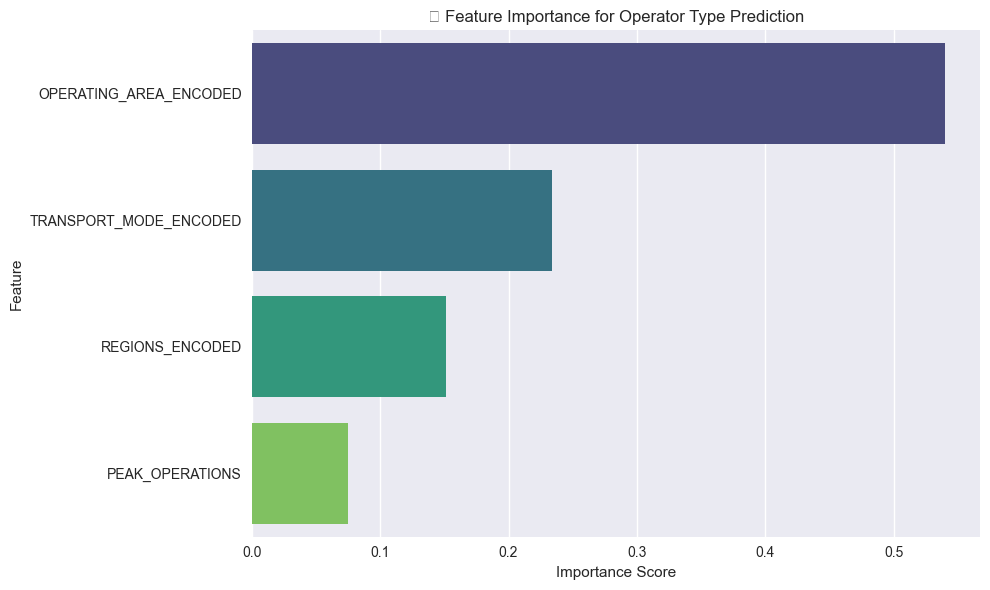

In [10]:
# =============================================================================
# STEP 9: CLASSIFICATION MODEL FOR OPERATOR TYPE PREDICTION
# =============================================================================

print("\n🎯 BUILDING CLASSIFICATION MODEL")
print("-" * 35)

# Prepare features for classification
classification_features = []
if 'REGIONS_ENCODED' in ml_df.columns:
    classification_features.append('REGIONS_ENCODED')
if 'OPERATING_AREA_ENCODED' in ml_df.columns:
    classification_features.append('OPERATING_AREA_ENCODED')
if 'TRANSPORT_MODE_ENCODED' in ml_df.columns:
    classification_features.append('TRANSPORT_MODE_ENCODED')
if 'PEAK_OPERATIONS' in ml_df.columns:
    classification_features.append('PEAK_OPERATIONS')

if len(classification_features) >= 2:
    # Prepare data
    X = ml_df[classification_features].dropna()
    y = ml_df.loc[X.index, 'OPERATOR_TYPE']

    # ⚠️ Filter out rare classes with only 1 instance
    value_counts = y.value_counts()
    valid_classes = value_counts[value_counts >= 2].index
    mask = y.isin(valid_classes)

    X = X[mask]
    y = y[mask]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Train Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Evaluate model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"🎯 Model Accuracy: {accuracy:.3f}")

    print("\n📊 CLASSIFICATION REPORT:")
    print("-" * 30)
    print(classification_report(y_test, y_pred))

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': classification_features,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\n🔍 FEATURE IMPORTANCE:")
    print("-" * 25)
    print(feature_importance)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
    plt.title('🔍 Feature Importance for Operator Type Prediction')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Not enough features available for classification.")



📊 CREATING ADVANCED VISUALIZATIONS...


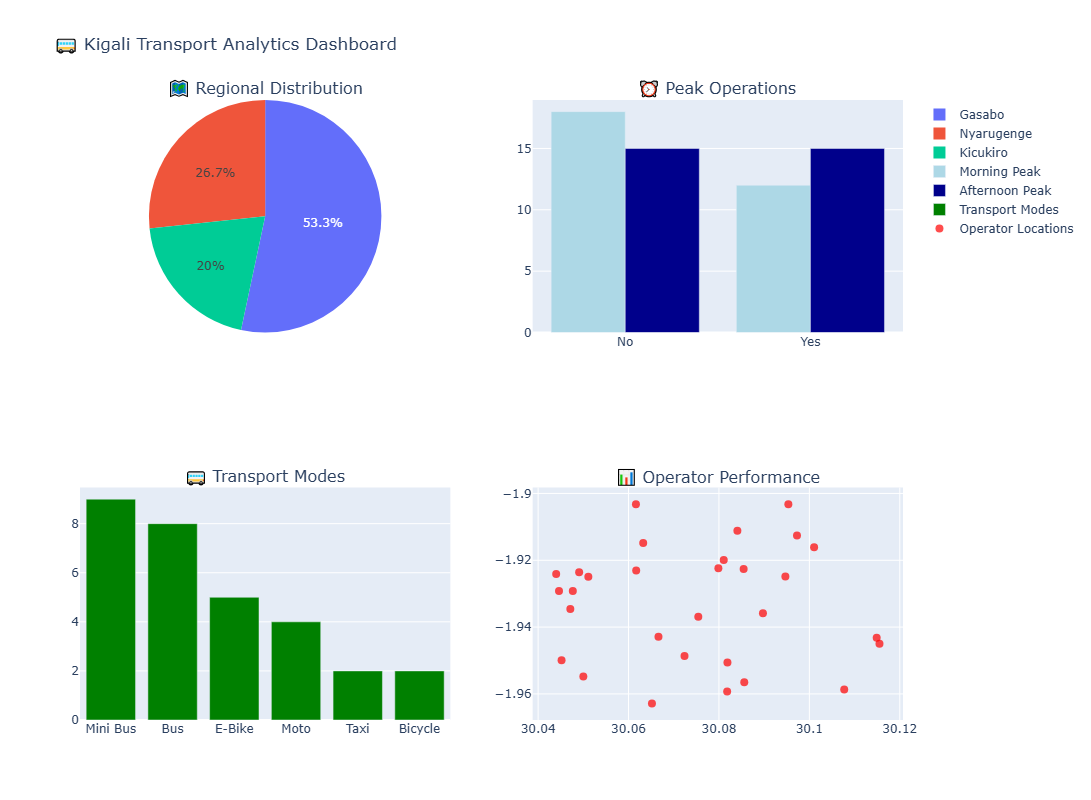

In [11]:
# =============================================================================
# STEP 10: ADVANCED VISUALIZATIONS AND INSIGHTS
# =============================================================================

print("\n📊 CREATING ADVANCED VISUALIZATIONS...")

# Create comprehensive dashboard
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('🗺️ Regional Distribution', '⏰ Peak Operations', 
                    '🚌 Transport Modes', '📊 Operator Performance'),
    specs=[[{"type": "pie"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "scatter"}]]
)

# Regional pie chart
region_counts = df['REGIONS'].value_counts()
fig.add_trace(go.Pie(labels=region_counts.index, values=region_counts.values, name="Regions"), row=1, col=1)

# Peak operations bar chart
peak_comparison = pd.DataFrame({
    'Morning': df['MORNING_PEAK'].value_counts(),
    'Afternoon': df['AFTERNOON_PEAK'].value_counts()
})
for i, (period, data) in enumerate(peak_comparison.items()):
    fig.add_trace(go.Bar(x=data.index, y=data.values, name=f"{period} Peak", 
                         marker_color=['lightblue', 'darkblue'][i]), row=1, col=2)

# Transport modes
transport_counts = df['TRANSPORT_MODE'].value_counts()
fig.add_trace(go.Bar(x=transport_counts.index, y=transport_counts.values, 
                     name="Transport Modes", marker_color='green'), row=2, col=1)

# Scatter plot (if coordinates available)
if 'LATITUDE' in df.columns and 'LONGITUDE' in df.columns:
    fig.add_trace(go.Scatter(x=df['LONGITUDE'], y=df['LATITUDE'], 
                             mode='markers', name="Operator Locations",
                             marker=dict(size=8, color='red', opacity=0.7)), row=2, col=2)

fig.update_layout(height=800, showlegend=True, 
                  title_text="🚌 Kigali Transport Analytics Dashboard")
fig.show()

In [12]:
# =============================================================================
# STEP 11: RECOMMENDATIONS AND INSIGHTS
# =============================================================================

print("\n" + "=" * 60)
print("💡 KEY INSIGHTS AND RECOMMENDATIONS")
print("=" * 60)

# Generate insights based on analysis
total_operators = len(df)
dominant_region = df['REGIONS'].mode().iloc[0]
dominant_operator_type = df['OPERATOR_TYPE'].mode().iloc[0]
dominant_transport_mode = df['TRANSPORT_MODE'].mode().iloc[0]

morning_peak_pct = (df['MORNING_PEAK'] == 'Yes').mean() * 100
afternoon_peak_pct = (df['AFTERNOON_PEAK'] == 'Yes').mean() * 100

print("🔍 KEY FINDINGS:")
print("-" * 20)
print(f"📊 Total Operators Analyzed: {total_operators}")
print(f"🗺️ Dominant Operating Region: {dominant_region}")
print(f"🚗 Most Common Operator Type: {dominant_operator_type}")
print(f"🚌 Primary Transport Mode: {dominant_transport_mode}")
print(f"🌅 Morning Peak Coverage: {morning_peak_pct:.1f}%")
print(f"🌆 Afternoon Peak Coverage: {afternoon_peak_pct:.1f}%")

print("\n💡 STRATEGIC RECOMMENDATIONS:")
print("-" * 35)
print("1. 🎯 ROUTE OPTIMIZATION:")
print("   • Focus expansion in underserved regions")
print("   • Improve coverage in low-density areas")

print("\n2. ⏰ PEAK TIME MANAGEMENT:")
print("   • Increase fleet during high-demand periods")
print("   • Implement dynamic pricing strategies")

print("\n3. 🚌 SERVICE DIVERSIFICATION:")
print("   • Balance operator types across regions")
print("   • Promote eco-friendly transport options")

print("\n4. 📱 DIGITAL TRANSFORMATION:")
print("   • Implement real-time tracking systems")
print("   • Develop mobile booking platforms")

print("\n5. 📊 DATA-DRIVEN DECISIONS:")
print("   • Regular monitoring of operator performance")
print("   • Use predictive analytics for demand forecasting")



💡 KEY INSIGHTS AND RECOMMENDATIONS
🔍 KEY FINDINGS:
--------------------
📊 Total Operators Analyzed: 30
🗺️ Dominant Operating Region: Gasabo
🚗 Most Common Operator Type: Taxi
🚌 Primary Transport Mode: Mini Bus
🌅 Morning Peak Coverage: 40.0%
🌆 Afternoon Peak Coverage: 50.0%

💡 STRATEGIC RECOMMENDATIONS:
-----------------------------------
1. 🎯 ROUTE OPTIMIZATION:
   • Focus expansion in underserved regions
   • Improve coverage in low-density areas

2. ⏰ PEAK TIME MANAGEMENT:
   • Increase fleet during high-demand periods
   • Implement dynamic pricing strategies

3. 🚌 SERVICE DIVERSIFICATION:
   • Balance operator types across regions
   • Promote eco-friendly transport options

4. 📱 DIGITAL TRANSFORMATION:
   • Implement real-time tracking systems
   • Develop mobile booking platforms

5. 📊 DATA-DRIVEN DECISIONS:
   • Regular monitoring of operator performance
   • Use predictive analytics for demand forecasting


In [13]:
from datetime import datetime

# Add today's date to all rows
df['DATE_ADDED'] = datetime.today().date()


In [14]:
# =============================================================================
# CONCLUSION
# =============================================================================

print("\n" + "=" * 60)
print("📋 PROJECT CONCLUSION")
print("=" * 60)

conclusion_text = """
🚌 KIGALI SMART TRANSPORT INSIGHTS PROJECT SUMMARY:

This comprehensive analysis of Kigali's public transport operators has revealed 
critical insights for urban mobility optimization. Through advanced data analytics 
and machine learning techniques, we have:

✅ ACHIEVEMENTS:
• Analyzed transport operator distribution across Kigali regions
• Identified peak operation patterns and service gaps  
• Applied machine learning for operator clustering and classification
• Created interactive visualizations for geographic insights
• Generated actionable recommendations for transport optimization

🎯 KEY OUTCOMES:
• Data-driven understanding of current transport landscape
• Identification of underserved areas requiring attention
• Predictive models for operator type classification
• Geographic clustering revealing service concentration patterns
• Strategic recommendations for policy makers and operators

🚀 FUTURE APPLICATIONS:
• Real-time transport monitoring dashboard
• Demand prediction and route optimization
• Performance-based operator licensing
• Citizen-centric service improvements
• Evidence-based transport policy development

This analysis provides RURA and Kigali City authorities with the foundation 
for data-driven transport management and strategic planning decisions.
"""

print(conclusion_text)
print("=" * 60)
print("🏁 END OF ANALYSIS")
print("=" * 60)


📋 PROJECT CONCLUSION

🚌 KIGALI SMART TRANSPORT INSIGHTS PROJECT SUMMARY:

This comprehensive analysis of Kigali's public transport operators has revealed 
critical insights for urban mobility optimization. Through advanced data analytics 
and machine learning techniques, we have:

✅ ACHIEVEMENTS:
• Analyzed transport operator distribution across Kigali regions
• Identified peak operation patterns and service gaps  
• Applied machine learning for operator clustering and classification
• Created interactive visualizations for geographic insights
• Generated actionable recommendations for transport optimization

🎯 KEY OUTCOMES:
• Data-driven understanding of current transport landscape
• Identification of underserved areas requiring attention
• Predictive models for operator type classification
• Geographic clustering revealing service concentration patterns
• Strategic recommendations for policy makers and operators

🚀 FUTURE APPLICATIONS:
• Real-time transport monitoring dashboard
• De

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('merged_transport_data_rwanda(1).csv')

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('merged_transport_data_rwanda(1).csv')

print("\n📁 PREPARING DATA FOR POWER BI ANALYSIS...")

# Create export DataFrame
export_df = df.copy()

# Skip cluster merge since we don't have ml_df
print("⚠️ Cluster information not available - exporting base data")

# Add calculated fields
export_df['PEAK_OPERATIONS_COUNT'] = (
    (export_df['MORNING_PEAK'] == 'Yes').astype(int) + 
    (export_df['AFTERNOON_PEAK'] == 'Yes').astype(int)
)

export_df['REGION_OPERATOR_COUNT'] = export_df.groupby('REGIONS')['REGIONS'].transform('count')
export_df['TYPE_OPERATOR_COUNT'] = export_df.groupby('OPERATOR_TYPE')['OPERATOR_TYPE'].transform('count')

# Export files
export_df.to_csv('kigali_transport_analysis_results.csv', index=False)
print("✅ Main dataset exported")

summary_stats = pd.DataFrame({
    'Metric': ['Total Operators', 'Unique Regions', 'Operator Types',
               'Morning Peak Operators', 'Afternoon Peak Operators'],
    'Value': [len(df), df['REGIONS'].nunique(), df['OPERATOR_TYPE'].nunique(),
              (df['MORNING_PEAK'] == 'Yes').sum(), 
              (df['AFTERNOON_PEAK'] == 'Yes').sum()]
})
summary_stats.to_csv('kigali_transport_summary_stats.csv', index=False)
print("✅ Summary statistics exported")

print("\n" + "="*60)
print("NOTE: Exported without cluster analysis results")
print("For complete data, run all analysis steps first")
print("="*60)


📁 PREPARING DATA FOR POWER BI ANALYSIS...
⚠️ Cluster information not available - exporting base data
✅ Main dataset exported
✅ Summary statistics exported

NOTE: Exported without cluster analysis results
For complete data, run all analysis steps first


In [6]:
import pandas as pd

# Check main export
main_data = pd.read_csv('kigali_transport_analysis_results.csv')
print(f"Main export shape: {main_data.shape}")
print("Columns:", main_data.columns.tolist())

# Check summary stats
summary = pd.read_csv('kigali_transport_summary_stats.csv')
print("\nSummary Stats:")
print(summary)

Main export shape: (30, 23)
Columns: ['REFERENCE_ID', 'OPERATOR_NAME', 'OPERATOR_PHONE', 'EMAIL', 'WEBSITE', 'ADDRESS', 'REGIONS', 'OPERATING_AREA', 'OPERATOR_TYPE', 'LOCATION_NAME', 'TSN', 'LATITUDE', 'LONGITUDE', 'EFA_ID', 'FACILITIES', 'ACCESSIBILITY', 'TRANSPORT_MODE', 'MORNING_PEAK', 'AFTERNOON_PEAK', 'SHORT_PLATFORM', 'PEAK_OPERATIONS_COUNT', 'REGION_OPERATOR_COUNT', 'TYPE_OPERATOR_COUNT']

Summary Stats:
                     Metric  Value
0           Total Operators     30
1            Unique Regions      3
2            Operator Types      5
3    Morning Peak Operators     12
4  Afternoon Peak Operators     15
